In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
def print_cm(cm):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']] 
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [3]:
#read in dataset
df = pd.read_csv('./combined.csv')

In [4]:
# frequency analyis for AOTRoute
df['AOTROUTE'].value_counts().head(20)

# scale down
AOTRoute = pd.Series(np.where(((df['AOTROUTE'] != 'US-7')&(df['AOTROUTE'] != 'I-89')&
                            (df['AOTROUTE'] != 'I-91')&(df['AOTROUTE'] != 'US-2')&
                            (df['AOTROUTE'] != 'US-5')&(df['AOTROUTE'] != 'VT-15')&
                            (df['AOTROUTE'] != 'VT-100')&(df['AOTROUTE'] != 'VT-9')&
                            (df['AOTROUTE'] != 'VT-2A')&(df['AOTROUTE'] != 'US-4')),'Other Route',df.AOTROUTE))
AOTRoute = pd.get_dummies(AOTRoute)


# get dummies for animal --> get "none" column for yes/no
animal = pd.get_dummies(df['Animal'])['None/Other']
#recode 0 to 1 and 1 to 0; this way a 1 is yes
animal = pd.Series(np.where(np.array(animal)==0,1,0))


# frequency analyis for CITYORTOWN
df['CITYORTOWN'].value_counts().head(20)

# scale down
city_town = pd.Series(np.where(((df['CITYORTOWN'] != 'Burlington')&(df['CITYORTOWN'] != 'Brattleboro')&
                            (df['CITYORTOWN'] != 'South Burlington')&(df['CITYORTOWN'] != 'Essex')&
                            (df['CITYORTOWN'] != 'Bennington')&(df['CITYORTOWN'] != 'Williston')&
                            (df['CITYORTOWN'] != 'Colchester')&(df['CITYORTOWN'] != 'Springfield')&
                            (df['CITYORTOWN'] != 'Hartford')&(df['CITYORTOWN'] != 'Milton')),'Other City',df.CITYORTOWN))
city_town = pd.get_dummies(city_town)


# DayNight --> save "night" case only as yes/no
night=pd.get_dummies(df['DayNight'])['Night']

# Impairment --> get "none" column for yes/no
impairment=pd.get_dummies(df['Impairment'])['None']
#recode 0 to 1 and 1 to 0; this way a 1 is yes
impairment = pd.Series(np.where(np.array(impairment)==0,1,0))

# get dummies for Injury
injury = pd.get_dummies(df['InjuryType'])
# remove "property damage only" which is the null case
injury = injury.drop(columns=['Property Damage Only'])

# get dummies for Involving
involving = pd.get_dummies(df['Involving'])
# remove "none" column which is the null case
involving = involving.drop(columns = ['None'])

# Get dummies for road condition
roadcondition = pd.get_dummies(df['RoadCondition'])
# drop "none" column which is the null case, unreported situations, and the surface condition; will add in later
roadcondition = roadcondition.drop(columns=['None', 'Other - Explain in Narrative', 'Not reported', 'Unknown',
                                            'Road Surface Condition(wet, icy, snow, slush, etc)'])

# get dummies for surface condition
surfacecondition = pd.get_dummies(df['SurfaceCondition'])
# drop "dry" column which is the null case along with unreported situations
surfacecondition = surfacecondition.drop(columns=['Dry', 'Not Reported', 'Other - Explain in Narrative', 'Unknown'])

# get dummies for weather
weather = pd.get_dummies(df['Weather'])
# drop "clear" column which is the null case along with unreported situations
weather = weather.drop(columns=['Clear', 'Unknown'])


# get accident dates
datetime = df['ACCIDENTDATE']
months = '' # new string
# use loop to extract month from date string
for i in range(len(datetime)):
    match = re.search(r'\d{4}-\d{2}-\d{2}', datetime[i]).group()
    months += match[5:7] + ','
# remove last extraneous comma from loop
months = months[:-1]
# split comma separated string
months = months.split(",")
# convert to DataFrame
months = pd.Series(months)

# determine season
seasons = ""
for i in range(len(months)):
    if months[i]=='12':
        seasons += 'Winter' + ','
    if months[i]=='01':
        seasons += 'Winter' + ','
    if months[i]=='02':
        seasons += 'Winter' + ','
    if months[i]=='03':
        seasons += 'Spring' + ','
    if months[i]=='04':
        seasons += 'Spring' + ','
    if months[i]=='05':
        seasons += 'Spring' + ','
    if months[i]=='06':
        seasons += 'Summer' + ','
    if months[i]=='07':
        seasons += 'Summer' + ','
    if months[i]=='08':
        seasons += 'Summer' + ','
    if months[i]=='09':
        seasons += 'Fall' + ','
    if months[i]=='10':
        seasons += 'Fall' + ','
    if months[i]=='11':
        seasons += 'Fall' + ','
# remove last extraneous comma from loop
seasons = seasons[:-1]
# split comma separated string
seasons = seasons.split(",")
# convert to DataFrame
seasons = pd.Series(seasons)
seasons = pd.get_dummies(seasons)

# Build data frame for PCA
pca_df = pd.concat([animal, night, impairment], axis=1)
pca_df.columns=['Animal', 'Night', 'Impairment']
pca_df = pd.concat([pca_df, AOTRoute, city_town, injury, involving, roadcondition, surfacecondition, weather, seasons],
                   axis=1, sort=False)
pca_df

,Animal,Night,Impairment,I-89,I-91,Other Route,US-2,US-4,US-5,US-7,...,Water (standing / moving),Wet,Cloudy,Freezing Precipitation,Rain,Wind,Fall,Spring,Summer,Winter
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49631,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
49632,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
49633,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
49634,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [5]:
pca_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Animal,49636.0,0.032053,0.176144,0.0,0.0,0.0,0.0,1.0
Night,49636.0,0.246938,0.431235,0.0,0.0,0.0,0.0,1.0
Impairment,49636.0,0.052905,0.223846,0.0,0.0,0.0,0.0,1.0
I-89,49636.0,0.067935,0.251636,0.0,0.0,0.0,0.0,1.0
I-91,49636.0,0.044988,0.207279,0.0,0.0,0.0,0.0,1.0
Other Route,49636.0,0.627105,0.483579,0.0,0.0,1.0,1.0,1.0
US-2,49636.0,0.041059,0.198428,0.0,0.0,0.0,0.0,1.0
US-4,49636.0,0.014506,0.119564,0.0,0.0,0.0,0.0,1.0
US-5,49636.0,0.038641,0.192741,0.0,0.0,0.0,0.0,1.0
US-7,49636.0,0.079136,0.269954,0.0,0.0,0.0,0.0,1.0


In [6]:
y = pca_df['Injury']
x = pca_df.drop(columns = ['Fatal', 'Injury'])

In [7]:
from sklearn.model_selection import train_test_split

# 20-80% simple split
# To make the result reproducible, set the random_state
train_y,test_y,train_x,test_x = train_test_split(y, x,
                                                 test_size=0.25,
                                                 random_state=123)

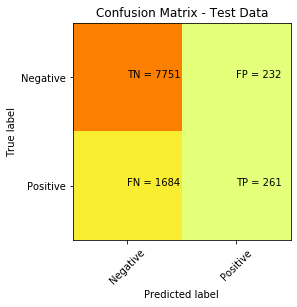

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7983
           1       0.53      0.13      0.21      1945

    accuracy                           0.81      9928
   macro avg       0.68      0.55      0.55      9928
weighted avg       0.76      0.81      0.76      9928



In [25]:
from sklearn import tree
# Decision trees for classification, use entropy criterion (gini by default)
dt = tree.DecisionTreeClassifier(max_features='sqrt')
dt.fit(train_x, train_y)
pred_y_dt = dt.predict(test_x)
print_cm(metrics.confusion_matrix(test_y, pred_y_dt))
print(metrics.classification_report(test_y, pred_y_dt))

In [24]:
metrics.accuracy_score(test_y, pred_y_dt)

0.8050966962127317